# Boson cloud timescales

In [1]:
%pylab inline
import gwaxion
from matplotlib import ticker

DAYSID_SI = 86164.09053133354
YRSID_SI = 31558149.7635456

Populating the interactive namespace from numpy and matplotlib


We will look at the two key timescales governing the evolution of a boson cloud around a black hole (BH): the superradiance instability timescale, and the gravitational-wave dissipation timescale.

For concreteness, let's look at a BH consistent with the GW150914 remnant, with $M = 60\, M_\odot$ and $\chi = 0.7$.

In [2]:
mbh = 60
chi = 0.7

## Instability

Let's first focus on the $e$-folding time of the cloud superradiant growth. We can obtain a quick estimate using closed-form approximations from [arXiv:1706.06311](https://arxiv.org/abs/1706.06311), e.g. for two example values of the boson mass (i.e. two values of $\alpha$):

In [3]:
print('Instability timescale\n---------------------')
for a in [0.1, 0.176]:
    print('alpha = %.3f :\t%.1f days' % (a, gwaxion.tinst_approx(mbh, a, chi) / DAYSID_SI))

Instability timescale
---------------------
alpha = 0.100 :	231.4 days
alpha = 0.176 :	1.4 days


Let's compare this analytic approximation to numerical results, in which we evolve the cloud using differential equations as in [arXiv:1411.0686](http://stacks.iop.org/0264-9381/32/i=13/a=134001?key=crossref.8a4e2e36ca36fb28e1d0a6868573e646).

Note that `gwaxion` provides both `amplitude_growth_time` and `number_growth_time`, which respectively refer to the field amplitude and occupation number, and differ by a factor of two.

In [4]:
# create an array of alphas
alphas = np.linspace(0, 0.2, 100)

# for each of those values, compute the instability timescale numerically
tinsts_amp = []
tinsts_num = []
for a in alphas:
    bhb = gwaxion.BlackHoleBoson.from_parameters(m_bh=mbh, chi_bh=chi, alpha=a)
    c = bhb.cloud(1, 1, 0)
    tinsts_amp.append(c.amplitude_growth_time)
    tinsts_num.append(c.number_growth_time)
#     tgws.append(c.get_life_time())

/Users/richardbrito/opt/anaconda3/envs/gwaxion/lib/python3.7/site-packages/gwaxion/physics.py:424: RuntimeWarning: divide by zero encountered in double_scalars
  self.reduced_compton_wavelength = HBAR_SI / (mass*C_SI)
/Users/richardbrito/opt/anaconda3/envs/gwaxion/lib/python3.7/site-packages/gwaxion/physics.py:1126: RuntimeWarning: divide by zero encountered in double_scalars
  self.nr)


/Users/richardbrito/opt/anaconda3/envs/gwaxion/lib/python3.7/site-packages/gwaxion/physics.py:193: RuntimeWarning: divide by zero encountered in true_divide
  t =  27. * DAYSID_SI * (m/(10*MSUN_SI)) * (0.1/alpha)**9 / chi


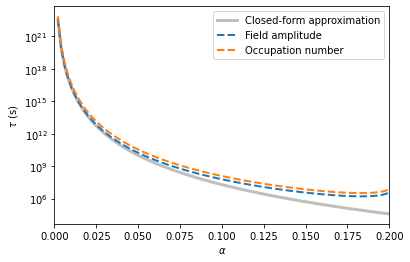

In [5]:
tinsts_ana = gwaxion.tinst_approx(mbh, alphas, chi)

plot(alphas, tinsts_ana, label='Closed-form approximation', lw=3, c='gray', alpha=0.5)
plot(alphas, tinsts_amp, label='Field amplitude', lw=2, ls='--')
plot(alphas, tinsts_num, label='Occupation number', lw=2, ls='--')

xlim(0, 0.2);
yscale('log');
ylabel(r'$\tau$ (s)');
xlabel(r'$\alpha$');

legend(loc='best');

The closed-form expression underestimates the instability time, especially for higher values of $\alpha$.

## Dissipation

Let's now look at the $e$-folding time of the cloud dissipation through gravitational-wave emission. As above, we can obtain a quick estimate using closed-form approximations from [arXiv:1706.06311](https://arxiv.org/abs/1706.06311), e.g. for two example values of the boson mass (i.e. two values of $\alpha$):

In [6]:
print('Dissipation timescale\n---------------------')
for a in [0.1, 0.176]:
    print('alpha = %.3f :\t%.1f years' % (a, gwaxion.tgw_approx(mbh, a, chi) / YRSID_SI))

Dissipation timescale
---------------------
alpha = 0.100 :	557142.9 years
alpha = 0.176 :	115.7 years


Let's compare this analytic approximation to numerical results, based on the estimates for the GW power from [arXiv:1706.06311](https://arxiv.org/abs/1706.06311). This can be obtained from a `BosonCloud` object through the `get_life_time()` method.

In [7]:
# create an array of alphas
alphas = np.linspace(0, 0.2, 100)

# for each of those values, compute the instability timescale numerically
tgws = []
for a in alphas:
    bhb = gwaxion.BlackHoleBoson.from_parameters(m_bh=mbh, chi_bh=chi, alpha=a)
    c = bhb.cloud(1, 1, 0)
    tgws.append(c.get_life_time())

/Users/richardbrito/opt/anaconda3/envs/gwaxion/lib/python3.7/site-packages/gwaxion/physics.py:424: RuntimeWarning: divide by zero encountered in double_scalars
  self.reduced_compton_wavelength = HBAR_SI / (mass*C_SI)
/Users/richardbrito/opt/anaconda3/envs/gwaxion/lib/python3.7/site-packages/gwaxion/physics.py:1042: RuntimeWarning: divide by zero encountered in double_scalars
  epsilon = 1./bhb_0.boson.omega
/Users/richardbrito/opt/anaconda3/envs/gwaxion/lib/python3.7/site-packages/gwaxion/physics.py:1126: RuntimeWarning: divide by zero encountered in double_scalars
  self.nr)
/Users/richardbrito/opt/anaconda3/envs/gwaxion/lib/python3.7/site-packages/gwaxion/physics.py:1052: RuntimeWarning: invalid value encountered in double_scalars
  wR_0 = bhb_0.level_omega_re(n) * epsilon
/Users/richardbrito/opt/anaconda3/envs/gwaxion/lib/python3.7/site-packages/gwaxion/physics.py:1053: RuntimeWarning: invalid value encountered in double_scalars
  wI_0 = bhb_0.level_omega_im(l, m, nr) * epsilon
/Us

/Users/richardbrito/opt/anaconda3/envs/gwaxion/lib/python3.7/site-packages/gwaxion/physics.py:199: RuntimeWarning: divide by zero encountered in true_divide
  t = (6.5E4) * YRSID_SI * (m/(10*MSUN_SI)) * (0.1/alpha)**15 / chi


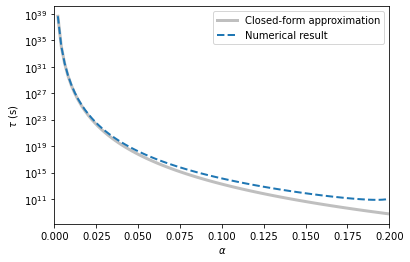

In [8]:
tgws_ana = gwaxion.tgw_approx(mbh, alphas, chi)

plot(alphas, tgws_ana, label='Closed-form approximation', lw=3, c='gray', alpha=0.5)
plot(alphas, tgws, label='Numerical result', lw=2, ls='--')

xlim(0, 0.2);
yscale('log');
ylabel(r'$\tau$ (s)');
xlabel(r'$\alpha$');

legend(loc='best');